In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from perceptron_classification import Perceptron


## 1_a: Fit an object oriented perceptron algorithm on the surgical dataset for classification

In [3]:
df= pd.read_csv("input/Surgical-deepnet.csv")
df.isnull().sum()
a=df.corr()
column_headers = list(df.columns)
columns=[]
for i in range(len(a.loc['complication'])-1):
    if a.loc['complication'][i]<0:
        columns.append(column_headers[i])
print(columns)

 


['bmi', 'Age', 'asa_status', 'baseline_cvd', 'baseline_osteoart', 'baseline_psych', 'gender', 'month']


In [4]:
X=df.drop(columns,axis=1).copy().values
Y=df['complication'].copy().values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
X_train.shape , Y_train.shape, X_test.shape, Y_test.shape


((11708, 17), (11708,), (2927, 17), (2927,))

In [5]:
perceptron= Perceptron(17,0.001)
perceptron.fit(X_train,Y_train,10,"sigmoid")

100%|██████████| 10/10 [00:01<00:00,  5.08it/s]


## 1_b. Plot accuracy in each epoch for train and test data

In [6]:
acc_train=[]
acc_test=[]
loss_train=[]
loss_test=[]
epochs=40
per= Perceptron(17,0.001)
for epoch in range(epochs):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = per.forward(x_train,'sigmoid')
        dW, db = per.back_propagation(x_train, y_train, y_pred)
        per.update(dW, db)
    losstrain,acctrain=per.evaluate( X_train, Y_train,'sigmoid')
    losstest,acctest=per.evaluate( X_test, Y_test,'sigmoid')
    acc_train.append(acctrain)
    acc_test.append(acctest)
    loss_train.append(losstrain)
    loss_test.append(losstest)


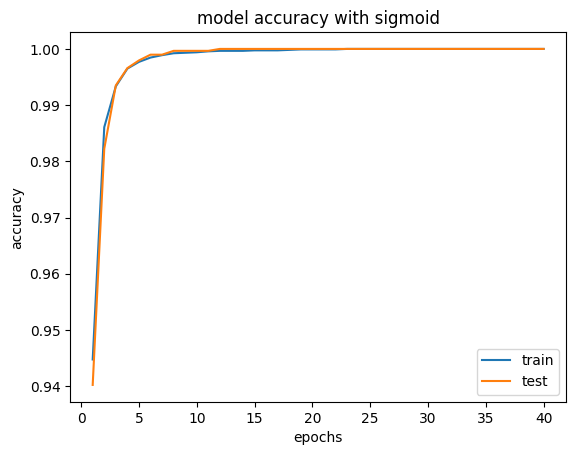

In [7]:
plt.plot(list(range(1,epochs+1)),acc_train,label="train")
plt.plot(list(range(1,epochs+1)),acc_test,label="test")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("model accuracy with sigmoid")
plt.legend()

plt.show()

## 1_c: Plot loss in each epoch for train and test data

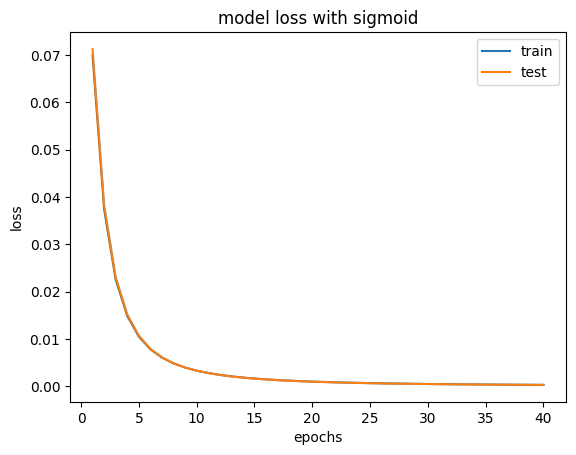

In [8]:
plt.plot(list(range(1,epochs+1)),loss_train,label="train")
plt.plot(list(range(1,epochs+1)),loss_test,label="test")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("model loss with sigmoid")
plt.legend()

plt.show()

## 1_d: Calculate confusion matrix

Text(0.5, 1.0, 'confusion matric with sigmoid')

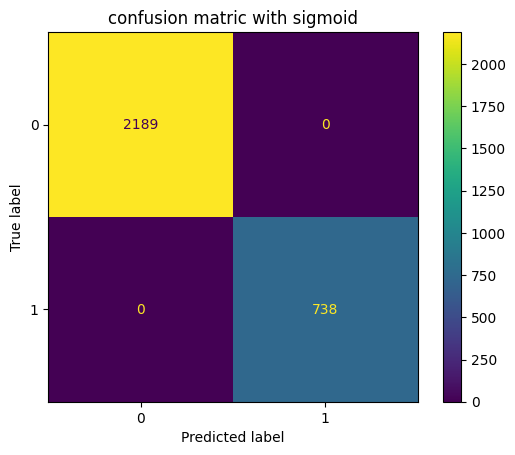

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Y_pred=per.predict(X_test,'sigmoid')
Y_pred=np.where(Y_pred<0.5,0,1)
cm =confusion_matrix(Y_test, Y_pred,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])

disp.plot()
disp.ax_.set_title('confusion matric with sigmoid')

In [10]:
from precision_recall import Score
from sklearn.metrics import precision_score, recall_score

score=Score([1])
my_precision=score.macro_precision(Y_test, Y_pred)
sklearn_precision=precision_score(Y_test, Y_pred)
my_recall=score.macro_recall(Y_test, Y_pred)
sklearn_recall=recall_score(Y_test, Y_pred)


print(f"My precision = {my_precision}")
print(f"My recall = {my_recall}")
print(f"sklearn precision = {sklearn_precision}")
print(f"sklearn recall = {sklearn_recall}")

My precision = 1.0
My recall = 1.0
sklearn precision = 1.0
sklearn recall = 1.0


## 1_e: Repeat the above steps with 5 different activation functions, e.g. sigmoid, tanh, relu, linear,...

## relu

In [11]:
acc_train=[]
acc_test=[]
loss_train=[]
loss_test=[]
epochs=40
per= Perceptron(17,0.001)
for epoch in range(epochs):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = per.forward(x=x_train,activation_func="relu")
        dW, db = per.back_propagation(x_train, y_train, y_pred)
        per.update(dW, db)
    losstrain,acctrain=per.evaluate( X_train, Y_train,"relu")
    losstest,acctest=per.evaluate( X_test, Y_test,"relu")
    acc_train.append(acctrain)
    acc_test.append(acctest)
    loss_train.append(losstrain)
    loss_test.append(losstest)

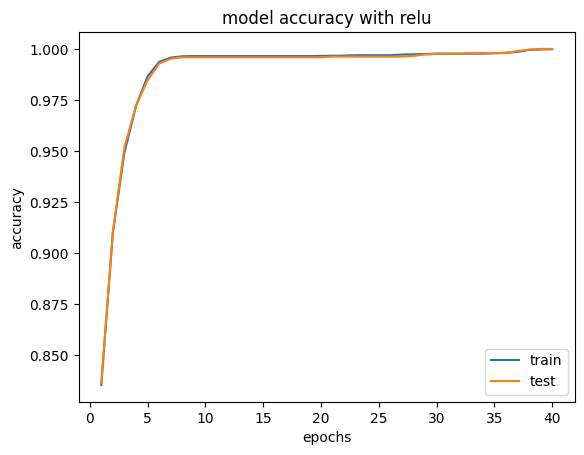

In [12]:
plt.plot(list(range(1,epochs+1)),acc_train,label="train")
plt.plot(list(range(1,epochs+1)),acc_test,label="test")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("model accuracy with relu")
plt.legend()

plt.show()

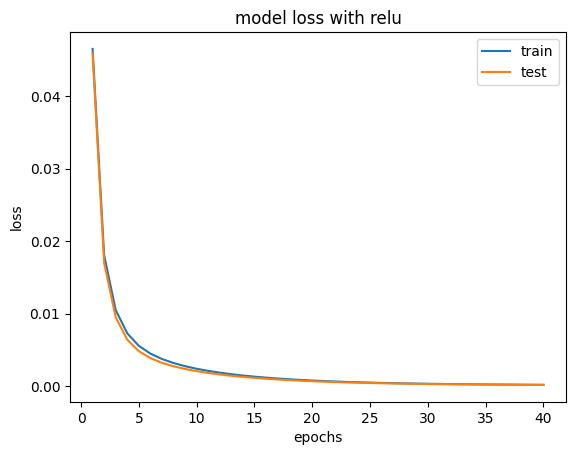

In [13]:
plt.plot(list(range(1,epochs+1)),loss_train,label="train")
plt.plot(list(range(1,epochs+1)),loss_test,label="test")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("model loss with relu")
plt.legend()

plt.show()

Text(0.5, 1.0, 'confusion matric with relu')

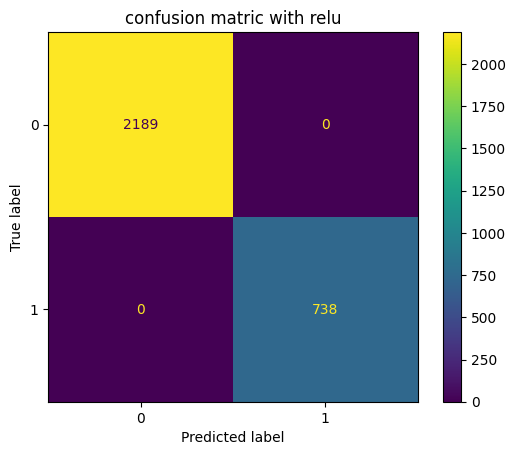

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Y_pred=per.predict(X_test,"relu")
Y_pred=np.where(Y_pred>0,1,0)
cm =confusion_matrix(Y_test, Y_pred,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])

disp.plot()
disp.ax_.set_title('confusion matric with relu')

In [15]:
from precision_recall import Score
from sklearn.metrics import precision_score, recall_score

score=Score([1])
my_precision=score.macro_precision(Y_test, Y_pred)
sklearn_precision=precision_score(Y_test, Y_pred)
my_recall=score.macro_recall(Y_test, Y_pred)
sklearn_recall=recall_score(Y_test, Y_pred)

my_recall=round(my_recall, 2)
print(f"My precision = {my_precision}")
print(f"My recall = {my_recall}")
print(f"sklearn precision = {sklearn_precision}")
print(f"sklearn recall = {sklearn_recall}")

My precision = 1.0
My recall = 1.0
sklearn precision = 1.0
sklearn recall = 1.0


## tanh

In [16]:
acc_train=[]
acc_test=[]
loss_train=[]
loss_test=[]
epochs=40
per= Perceptron(17,0.001)
for epoch in range(epochs):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = per.forward(x=x_train,activation_func="tanh")
        dW, db = per.back_propagation(x_train, y_train, y_pred)
        per.update(dW, db)
    losstrain,acctrain=per.evaluate( X_train, Y_train,"tanh")
    losstest,acctest=per.evaluate( X_test, Y_test,"tanh")
    acc_train.append(acctrain)
    acc_test.append(acctest)
    loss_train.append(losstrain)
    loss_test.append(losstest)

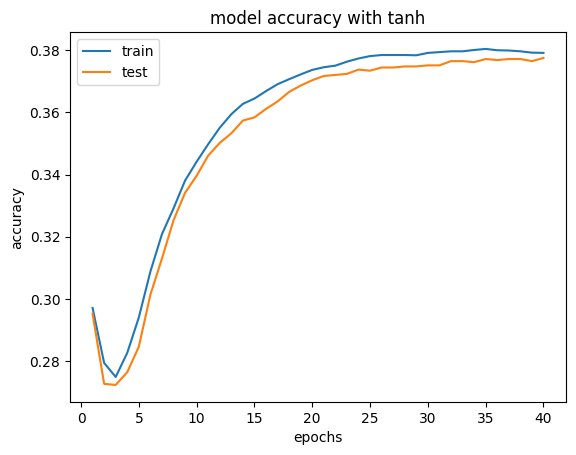

In [17]:
plt.plot(list(range(1,epochs+1)),acc_train,label="train")
plt.plot(list(range(1,epochs+1)),acc_test,label="test")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("model accuracy with tanh")
plt.legend()

plt.show()

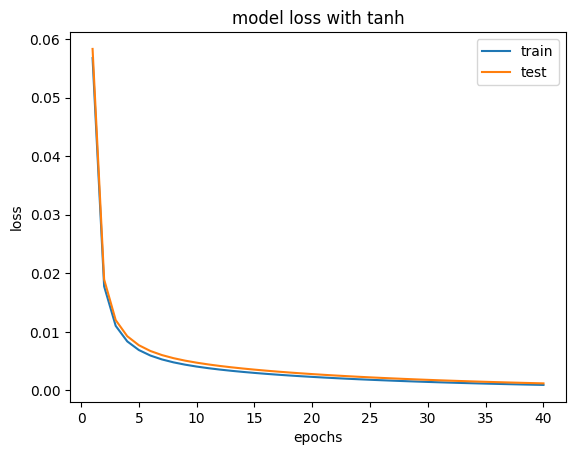

In [18]:
plt.plot(list(range(1,epochs+1)),loss_train,label="train")
plt.plot(list(range(1,epochs+1)),loss_test,label="test")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("model loss with tanh")
plt.legend()

plt.show()

Text(0.5, 1.0, 'confusion matric with tanh')

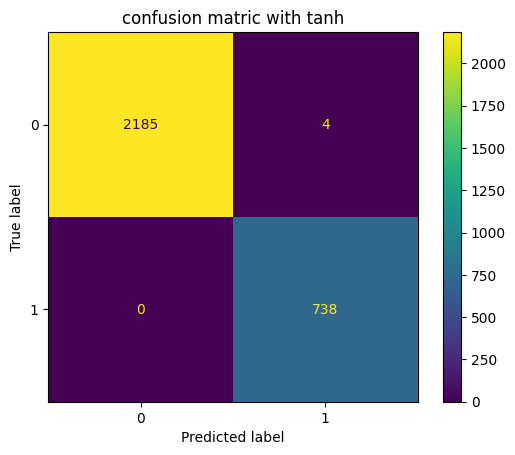

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Y_pred=per.predict(X_test,"tanh")

Y_pred=np.where(Y_pred<0.5,0,1)
cm =confusion_matrix(Y_test, Y_pred,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])

disp.plot()
disp.ax_.set_title('confusion matric with tanh')

In [20]:
from precision_recall import Score
from sklearn.metrics import precision_score, recall_score

score=Score([1])
my_precision=score.macro_precision(Y_test, Y_pred)
sklearn_precision=precision_score(Y_test, Y_pred)
my_recall=score.macro_recall(Y_test, Y_pred)
sklearn_recall=recall_score(Y_test, Y_pred)


print(f"My precision = {my_precision}")
print(f"My recall = {my_recall}")
print(f"sklearn precision = {sklearn_precision}")
print(f"sklearn recall = {sklearn_recall}")

My precision = 0.9946
My recall = 1.0
sklearn precision = 0.9946091644204852
sklearn recall = 1.0


## unitstep

In [21]:
acc_train=[]
acc_test=[]
loss_train=[]
loss_test=[]
epochs=40
per= Perceptron(17,0.001)
for epoch in range(epochs):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = per.forward(x=x_train,activation_func="unitstep")
        dW, db = per.back_propagation(x_train, y_train, y_pred)
        per.update(dW, db)
    losstrain,acctrain=per.evaluate( X_train, Y_train,"unitstep")
    losstest,acctest=per.evaluate( X_test, Y_test,"unitstep")
    acc_train.append(acctrain)
    acc_test.append(acctest)
    loss_train.append(losstrain)
    loss_test.append(losstest)

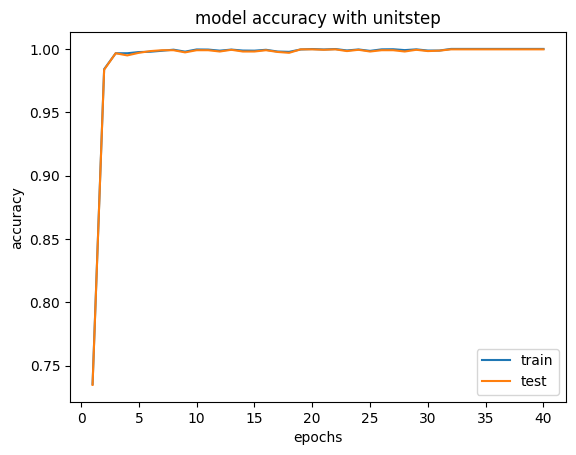

In [22]:
plt.plot(list(range(1,epochs+1)),acc_train,label="train")
plt.plot(list(range(1,epochs+1)),acc_test,label="test")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("model accuracy with unitstep")
plt.legend()

plt.show()

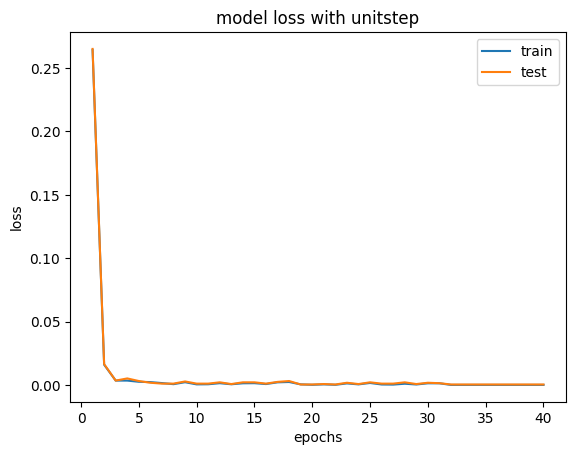

In [23]:
plt.plot(list(range(1,epochs+1)),loss_train,label="train")
plt.plot(list(range(1,epochs+1)),loss_test,label="test")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("model loss with unitstep")
plt.legend()

plt.show()

Text(0.5, 1.0, 'confusion matric with unitstep')

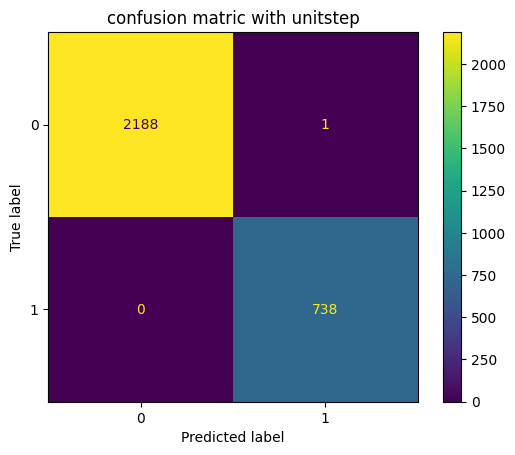

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Y_pred=per.predict(X_test,"unitstep")
Y_pred=np.where(Y_pred<0.5,0,1)
cm =confusion_matrix(Y_test, Y_pred,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])

disp.plot()
disp.ax_.set_title('confusion matric with unitstep')

In [25]:
from precision_recall import Score
from sklearn.metrics import precision_score, recall_score

score=Score([1])
my_precision=score.micro_precision(Y_test, Y_pred)
sklearn_precision=precision_score(Y_test, Y_pred)
my_recall=score.macro_recall(Y_test, Y_pred)
sklearn_recall=recall_score(Y_test, Y_pred)


print(f"My precision = {my_precision}")
print(f"My recall = {my_recall}")
print(f"sklearn precision = {sklearn_precision}")
print(f"sklearn recall = {sklearn_recall}")

My precision = 0.9986468200270636
My recall = 1.0
sklearn precision = 0.9986468200270636
sklearn recall = 1.0


## sign

In [31]:
acc_train=[]
acc_test=[]
loss_train=[]
loss_test=[]
epochs=40
per= Perceptron(17,0.001)
for epoch in range(epochs):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = per.forward(x=x_train,activation_func="sign")
        dW, db = per.back_propagation(x_train, y_train, y_pred)
        per.update(dW, db)
    losstrain,acctrain=per.evaluate( X_train, Y_train,"sign")
    losstest,acctest=per.evaluate( X_test, Y_test,"sign")
    acc_train.append(acctrain)
    acc_test.append(acctest)
    loss_train.append(losstrain)
    loss_test.append(losstest)

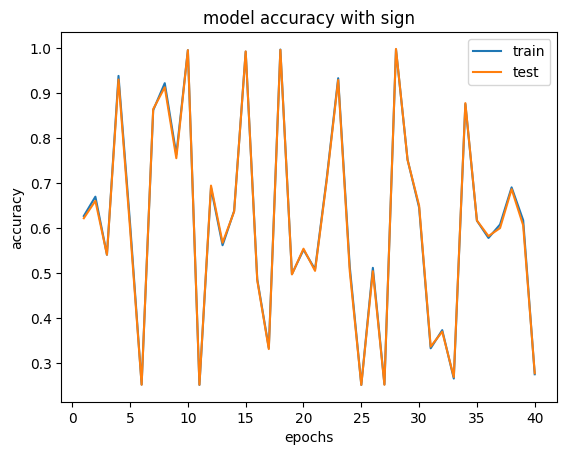

In [32]:
plt.plot(list(range(1,epochs+1)),acc_train,label="train")
plt.plot(list(range(1,epochs+1)),acc_test,label="test")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("model accuracy with sign")
plt.legend()

plt.show()

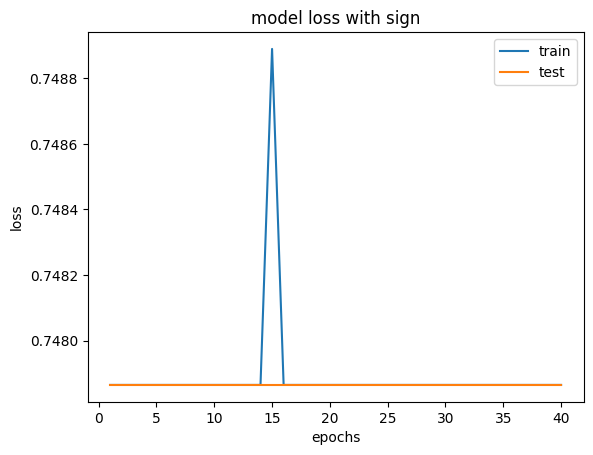

In [33]:
plt.plot(list(range(1,epochs+1)),loss_train,label="train")
plt.plot(list(range(1,epochs+1)),loss_test,label="test")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("model loss with sign")
plt.legend()

plt.show()


Text(0.5, 1.0, 'confusion matric with sign')

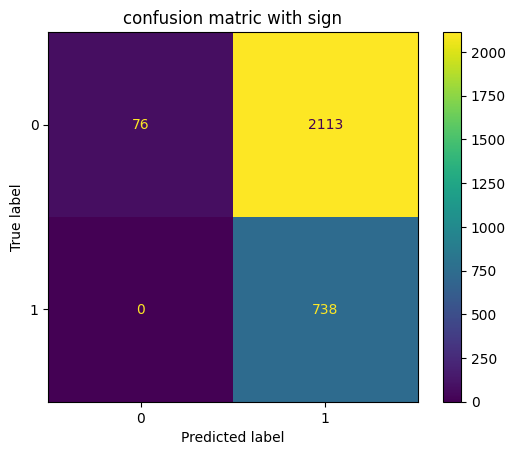

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Y_pred=per.predict(X_test,"sign")
Y_pred=np.where(Y_pred<0.5,0,1)
cm =confusion_matrix(Y_test, Y_pred,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])

disp.plot()
disp.ax_.set_title('confusion matric with sign')

In [35]:
from precision_recall import Score
from sklearn.metrics import precision_score, recall_score

score=Score([1])
my_precision=score.micro_precision(Y_test, Y_pred)
sklearn_precision=precision_score(Y_test, Y_pred)
my_recall=score.macro_recall(Y_test, Y_pred)
sklearn_recall=recall_score(Y_test, Y_pred)


print(f"My precision = {my_precision}")
print(f"My recall = {my_recall}")
print(f"sklearn precision = {sklearn_precision}")
print(f"sklearn recall = {sklearn_recall}")

My precision = 0.2588565415643634
My recall = 1.0
sklearn precision = 0.2588565415643634
sklearn recall = 1.0


## piece-wise-linear

In [36]:
acc_train=[]
acc_test=[]
loss_train=[]
loss_test=[]
epochs=40
per= Perceptron(17,0.001)
for epoch in tqdm(range(epochs)):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = per.forward(x=x_train,activation_func="piece-wise-linear")
        dW, db = per.back_propagation(x_train, y_train, y_pred)
        per.update(dW, db)
    losstrain,acctrain=per.evaluate( X_train, Y_train,"piece-wise-linear")
    losstest,acctest=per.evaluate( X_test, Y_test,"piece-wise-linear")
    acc_train.append(acctrain)
    acc_test.append(acctest)
    loss_train.append(losstrain)
    loss_test.append(losstest)

  0%|          | 0/40 [00:00<?, ?it/s]

d:\Pylearn\47\perceptron_classification.py:66: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(Y_pred)
100%|██████████| 40/40 [00:10<00:00,  3.76it/s]


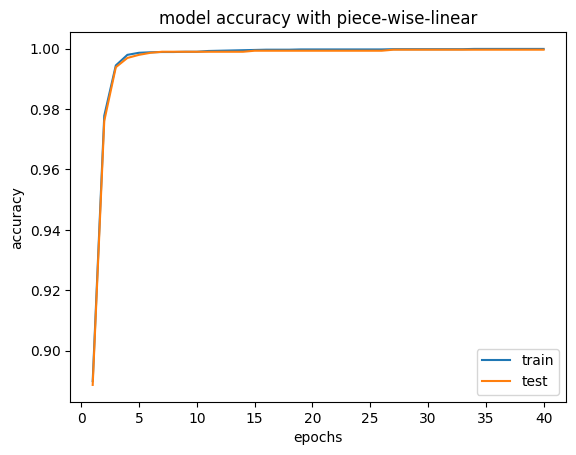

In [37]:
plt.plot(list(range(1,epochs+1)),acc_train,label="train")
plt.plot(list(range(1,epochs+1)),acc_test,label="test")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("model accuracy with piece-wise-linear")
plt.legend()

plt.show()

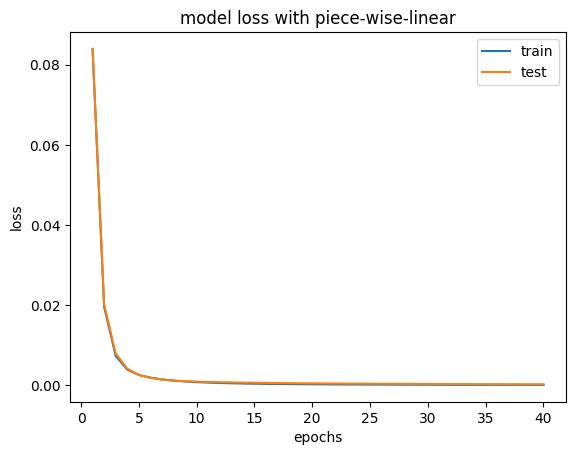

In [38]:
plt.plot(list(range(1,epochs+1)),loss_train,label="train")
plt.plot(list(range(1,epochs+1)),loss_test,label="test")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("model loss with piece-wise-linear")
plt.legend()

plt.show()

Text(0.5, 1.0, 'confusion matric with piece-wise-linear')

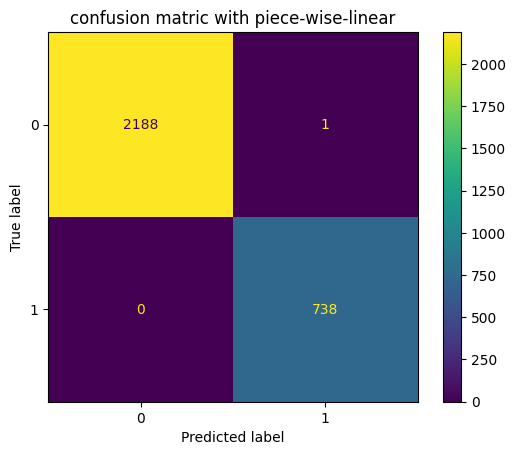

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Y_pred=per.predict(X_test,"piece-wise-linear")
Y_pred=np.where(Y_pred<0.5,0,1)
cm =confusion_matrix(Y_test, Y_pred,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])

disp.plot()
disp.ax_.set_title('confusion matric with piece-wise-linear')

In [41]:
from precision_recall import Score
from sklearn.metrics import precision_score, recall_score

score=Score([1])
my_precision=score.macro_precision(Y_test, Y_pred)
sklearn_precision=precision_score(Y_test, Y_pred)
my_recall=score.macro_recall(Y_test, Y_pred)
sklearn_recall=recall_score(Y_test, Y_pred)


print(f"My precision = {my_precision}")
print(f"My recall = {my_recall}")
print(f"sklearn precision = {sklearn_precision}")
print(f"sklearn recall = {sklearn_recall}")

My precision = 0.9986
My recall = 1.0
sklearn precision = 0.9986468200270636
sklearn recall = 1.0
